# Infiltrazione stazionaria in un suolo stratificato

Basato sui notebook di Niccolò Tubini e Riccardo Rigon.

Autori: Marco Feltrin, Alessandro Lagrecacolonna, Niccolò Schiavi Cappello.

## Introduzione

<figure>
    <img src="colonna_stratigrafica.jpg" width="800" height="800/1.618">
    <figcaption>Colonna stratigrafica di Bieno. </figcaption>
<figure>

In questo notebook si vuole analizzare l'infiltrazione nella colonna stratigrafica soprastante nel caso in cui si formi una pozza di 5cm sopra il piano di campagna e che questa resti invariata per tutto il periodo di analisi. 

Si suppone inoltre che la colonna di terreno sia libera di drenare sul fondo.

Si è preso un periodo di analisi di un mese (da 1/1/2020 a 1/2/2020) e si è supposto che la temperatura non influisca sul processo di infiltrazione.

In [2]:
import os
import pandas as pd
project_path = os.path.dirname(os.getcwd())

In [3]:
grid=pd.read_csv(project_path + '/WETGEO/Grid_input/ex2955_grid.csv')
grid

,Type,eta,K,equationStateID,parameterID
0,L,0.0,100,0.0,6.0
1,L,-2.0,150,0.0,9.0
2,L,-5.5,250,0.0,2.0
3,L,-10.0,150,0.0,1.0
4,L,-13.2,0,NaN,NaN


In [4]:
i_c=pd.read_csv(project_path + '/WETGEO/Grid_input/ex2955_ic.csv')
i_c

,eta,Psi0,T0,Unnamed: 3,Unnamed: 4
0,0.0,-5.0,273.15,NaN,NaN
1,-2.0,-3.0,273.15,NaN,NaN
2,-5.5,0.5,273.15,NaN,NaN
3,-10.0,5.0,273.15,NaN,NaN
4,-13.2,8.2,273.15,NaN,NaN


In [5]:
from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')


project_path = os.path.dirname(os.getcwd())


grid_input_file_name = project_path + "/WETGEO/Grid_input/ex2955_grid.csv"             #importa la griglia per discretizzare la colonna di suolo

ic_input_file_name = project_path + "/WETGEO/Grid_input/ex2955_ic.csv"                 #file che fornisce le condizioni iniziali 

parameter_input_file_name = project_path + "/WETGEO/Grid_input/Richards_VG.csv"        #importa il file con i parametri delle curve di Van Genuechten

dictionary_input_file_name = project_path + "/WETGEO/Grid_input/dictionary.csv"        #importa il dictionary contenete le informazioni sui suoli

grid_type = 'classical'                                                                #griglia classical formata da elementi tutti uguali

dz_min = -9999                      # not required for grid_type = 'classical'

dz_max = -9999                      # not required for grid_type = 'classical'

b = -9999                           # not required for grid_type = 'classical'

psi_interp_model = "linear"         # si usa una interpolazione lineare di psi 

T_interp_model = "linear"           # interpolazione lineare della temperatura 



output_file_name =  project_path + "/WETGEO/Grid_NetCDF/ex2955_grid.nc"   # crea un file NetCDF contenente tutte le informazioni sulla griglia

output_title = '''Computational grid for ex2955.
                  '''
output_summary = '''

'''

output_date = ''

output_institution = 'GEOframe'

In [6]:
data_grid = pd.read_csv(grid_input_file_name)
data_ic = pd.read_csv(ic_input_file_name)
data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:\Users\nicco\Desktop/WETGEO/Grid_NetCDF/ex2955_grid.nc


## Riepilogo delle impostazioni della simulazione eseguita tramite OMS console:

In [7]:
/*
* WHETGEO-1D ex01
*
* Author: Niccolo` Tubini and Riccardo Rigon
*/
import static oms3.SimBuilder.instance as OMS3
import static oms3.SimBuilder.*
def home = oms_prj



def richardsGridFileName = "$oms_prj//WETGEO/Grid_NetCDF/ex2955_prova.nc" #prende in input la griglia NetCDF creata sopra

def typeClosureEquation = "{Van Genuchten}"               #si è utilizzato il modello di Van Genuechten

def typeEquationState = "{Van Genuchten}"

def typeUHCModel = "{Mualem Van Genuchten}"

def typeUHCTemperatureModel = "notemperature"             #non si tiene conto della temperatura come da ipotesi iniziali

def interfaceHydraulicConductivityModel = "max"           #all'interfaccia tra due strati si utilizza il k massimo tra quelli dei due strati 

def topBCType = "Top Dirichlet"                           #sul piano di campagna si assegna una condizione al contorno di Dirichelet

def bottomBCType = "Bottom free drainage"                 #come da ipotesi si suppone il fondo libero di drenare

def stationID = "1"

def startDate= "2020-01-01 00:00"

def endDate="2020-02-01 00:00"

def tTimestep = 30                                        #si usa un timestep di 30 minuti

def topBCFileName = "$oms_prj//WETGEO/Timeseries/ex2955_water_ponding.csv"

def bottomBCFileName = "$oms_prj//WETGEO/Timeseries/ex2955_free_drainage.csv"

def saveDatesFileName = "$oms_prj//WETGEO/Timeseries/ex2955_save_dates.csv"

def outputFileName = "$oms_prj//WETGEO/output/ex2955.nc"


def writeFrequency = 10000


solver = OMS3.sim(name: "Integrate PDE", {

resource "$oms_prj/dist"

	model(while : "reader_data_topBC.doProcess"  ){

		components {
			
			// reads of the grid.nc file
			"readNetCDF" "it.geoframe.blogpsot.netcdf.monodimensionalproblemtimedependent.ReadNetCDFRichardsGrid1D"
			
			// solve Richards' equation
			"solver" "it.geoframe.blogspot.whetgeo1d.richardssolver.RichardsSolver1DMain"
			
			// time-series reader
			"reader_data_topBC"         "org.hortonmachine.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"reader_data_bottomBC"      "org.hortonmachine.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"reader_data_save_dates"    "org.hortonmachine.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			
			// this component stores solver's output during the simulation
			"buffer" "it.geoframe.blogspot.buffer.buffertowriter.RichardsBuffer1D"
			
			// output writer in a NetCDF format
			"writeNetCDF" "it.geoframe.blogpsot.netcdf.monodimensionalproblemtimedependent.WriteNetCDFRichards1DDouble"
		
		}
		
		parameter {

			"readNetCDF.richardsGridFilename" "${richardsGridFileName}"


			"solver.typeClosureEquation" "${typeClosureEquation}"
			

			"solver.typeEquationState" "${typeEquationState}"


			"solver.typeUHCModel" "${typeUHCModel}"


			"solver.typeUHCTemperatureModel" "${typeUHCTemperatureModel}"

            
			"solver.interfaceHydraulicConductivityModel" "${interfaceHydraulicConductivityModel}"
						

			"solver.topBCType"  "${topBCType}"

            
			"solver.bottomBCType"  "${bottomBCType}"

            
			"solver.stationID"  "${stationID}"
			

			"solver.newtonTolerance" "0.00000000001"


			"solver.nestedNewton" "1"

			"solver.picardIteration" "1"

			"solver.tTimeStep" tTimestep*60


			"solver.timeDelta" tTimestep*60

			"reader_data_topBC.file"             "${topBCFileName}"
			"reader_data_topBC.idfield"          "ID"  
			"reader_data_topBC.tStart"           "${startDate}"
			"reader_data_topBC.tEnd"             "${endDate}"
			"reader_data_topBC.tTimestep"        "${tTimestep}"
			"reader_data_topBC.fileNovalue"      "-9999"

			"reader_data_bottomBC.file"             "${bottomBCFileName}"
			"reader_data_bottomBC.idfield"          "ID"  
			"reader_data_bottomBC.tStart"           "${startDate}"
			"reader_data_bottomBC.tEnd"             "${endDate}"
			"reader_data_bottomBC.tTimestep"        "${tTimestep}"
			"reader_data_bottomBC.fileNovalue"      "-9999"
			
			"reader_data_save_dates.file"             "${saveDatesFileName}"
			"reader_data_save_dates.idfield"          "ID"  
			"reader_data_save_dates.tStart"           "${startDate}"
			"reader_data_save_dates.tEnd"             "${endDate}"
			"reader_data_save_dates.tTimestep"        "${tTimestep}"
			"reader_data_save_dates.fileNovalue"      "-9999"
			
			
			"buffer.writeFrequency"                   "${writeFrequency}"

			// folder path for the output files
			"writeNetCDF.fileName" "${outputFileName}"
			// here you can enter a string to describe your simulation
			"writeNetCDF.briefDescritpion"               "WHETGEO-1D ex01."
			"writeNetCDF.writeFrequency"                 "${writeFrequency}"
			"writeNetCDF.timeUnits"                      "Minutes since 01/01/1970 00:00:00 UTC"
			"writeNetCDF.timeZone"                       "UTC"
			"writeNetCDF.fileSizeMax"                    "10000"
			"writeNetCDF.outVariables"                   "{darcyVelocity}"
			"writeNetCDF.pathGrid"		                 "${richardsGridFileName}"
			"writeNetCDF.pathTopBC"		                 "${topBCFileName}"
			"writeNetCDF.pathBottomBC"	                 "${bottomBCFileName}"
			"writeNetCDF.topBC"		                     "${topBCType}"
			"writeNetCDF.bottomBC"	                     "${bottomBCType}"
			"writeNetCDF.swrcModel"                      "${typeClosureEquation}"
			"writeNetCDF.soilHydraulicConductivityModel" "${typeUHCModel}"
			"writeNetCDF.interfaceConductivityModel"     "${interfaceHydraulicConductivityModel}"
			
		}

		connect{


			"readNetCDF.z"                      "solver.z"
			"readNetCDF.spaceDelta"             "solver.spaceDeltaZ"
			"readNetCDF.psiIC"                  "solver.psiIC"
			"readNetCDF.temperature"            "solver.temperature"
			"readNetCDF.controlVolume"          "solver.controlVolume"
			"readNetCDF.Ks"                     "solver.ks"
			"readNetCDF.thetaS"                 "solver.thetaS"
			"readNetCDF.thetaR"                 "solver.thetaR"
			"readNetCDF.par1SWRC"               "solver.par1SWRC"
			"readNetCDF.par2SWRC"               "solver.par2SWRC"
			"readNetCDF.par3SWRC"               "solver.par3SWRC"
			"readNetCDF.par4SWRC"               "solver.par4SWRC"
			"readNetCDF.par5SWRC"               "solver.par5SWRC"
			"readNetCDF.alphaSS"                "solver.alphaSpecificStorage"
			"readNetCDF.betaSS"                 "solver.betaSpecificStorage"
			"readNetCDF.equationStateID"        "solver.inEquationStateID"
			"readNetCDF.parameterID"            "solver.inParameterID"

			"reader_data_topBC.tCurrent"        "solver.inCurrentDate"
			"reader_data_topBC.outData"         "solver.inTopBC"
			"reader_data_bottomBC.outData"      "solver.inBottomBC"
			"reader_data_save_dates.outData"    "solver.inSaveDate"
			
			
			
			// input buffer
			"solver.inCurrentDate"        "buffer.inputDate"
			"solver.doProcessBuffer"      "buffer.doProcessBuffer"
			"solver.outputToBuffer"       "buffer.inputVariable"

			
			// input writeNetCDF
			"reader_data_topBC.doProcess"        "writeNetCDF.doProcess"
			
			"buffer.myVariable"                  "writeNetCDF.variables"
			
			"readNetCDF.eta"                     "writeNetCDF.spatialCoordinate"
			"readNetCDF.etaDual"                 "writeNetCDF.dualSpatialCoordinate"
			"readNetCDF.controlVolume"           "writeNetCDF.controlVolume"
			"readNetCDF.psiIC"                   "writeNetCDF.psiIC"
			"readNetCDF.temperature"             "writeNetCDF.temperature"
			
			
		}
	}

	}

)


SyntaxError: invalid syntax (582812408.py, line 2)

## Post-processing  <a class="anchor" id="post_processing"></a> 

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": False,          #va messo False se non si ha installato sul computer LaTEX
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

**Output file**

In [9]:
ds = xr.open_dataset(project_path + '/WETGEO/output/ex2955_0000.nc')

In [10]:
ds  

<xarray.Dataset>
Dimensions:           (depth: 650, dualDepth: 650, time: 1489)
Coordinates:
  * depth             (depth) float64 -13.19 -13.17 -13.15 ... -0.05 -0.03 -0.01
  * dualDepth         (dualDepth) float64 -13.2 -13.18 -13.16 ... -0.04 -0.02
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-02-01
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex01.
    Top_boundary_condition:             Top Dirichlet
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\marco\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\marco\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\marco\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

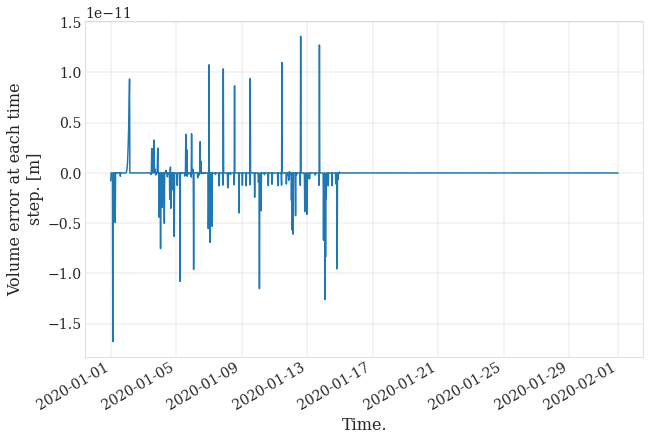

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
ds.error.plot(ax=ax)
plt.show()

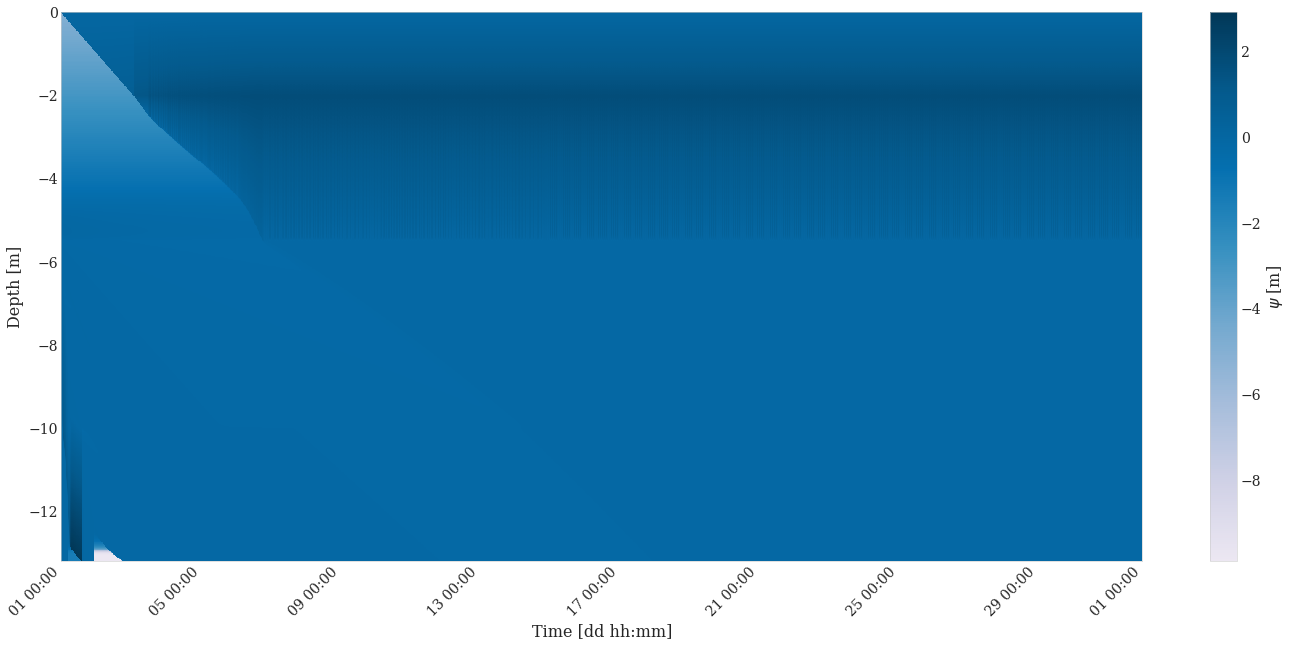

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

a = ds.psi.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\psi$ [m]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

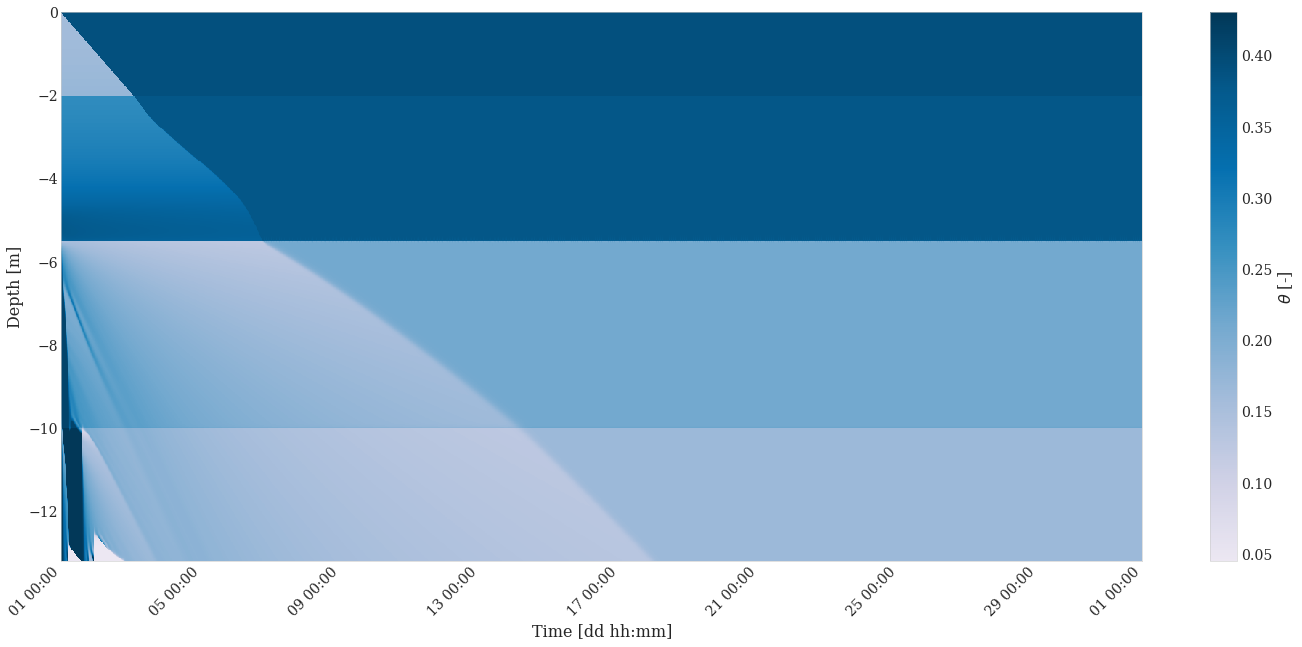

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.theta.values), vmax=np.amax(ds.theta.values))

a = ds.theta.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\\theta$ [-]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

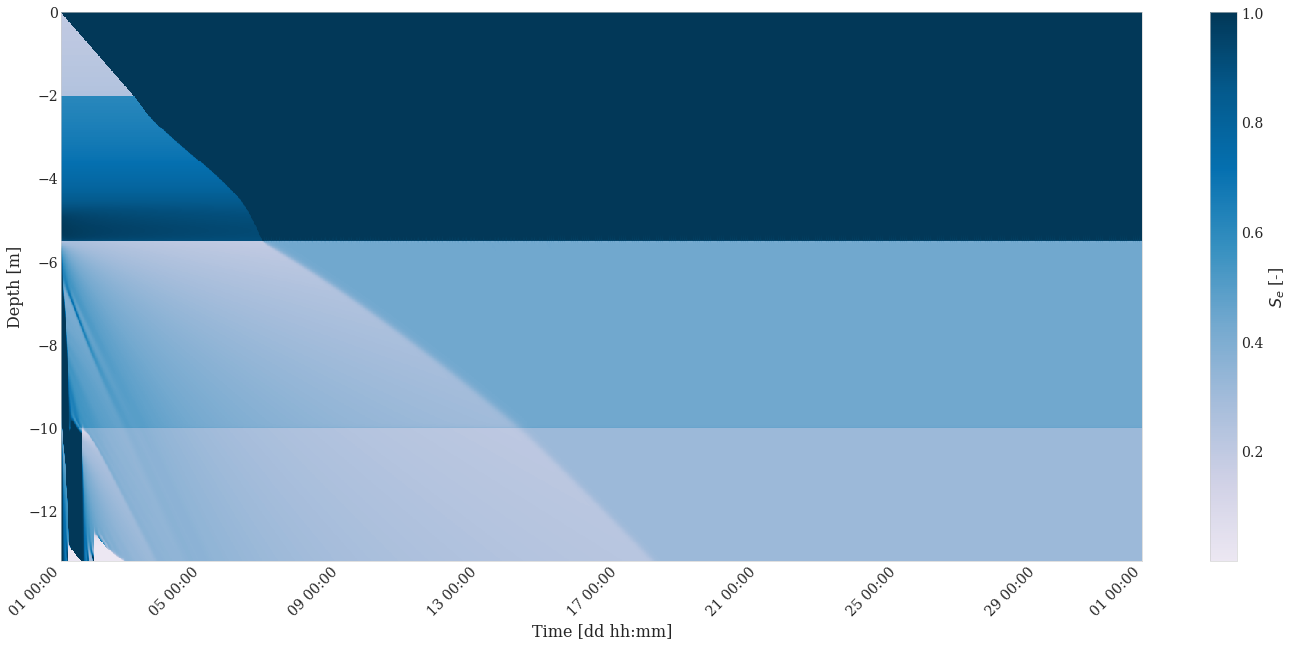

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.saturationDegree.values), vmax=np.amax(ds.saturationDegree.values))

a = ds.saturationDegree.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$S_e$ [-]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

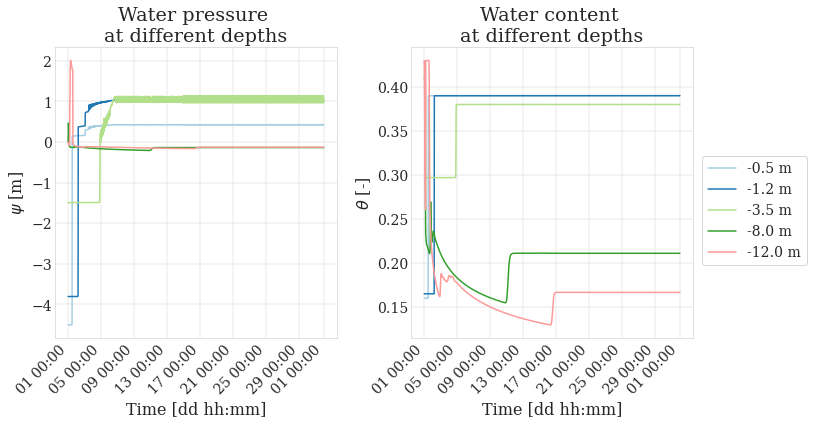

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-1.2, method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-3.5, method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-8.0, method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-12.0, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[0])
ds.theta.sel(depth=-1.2, method='nearest').plot(ax=ax2, label = '-1.2 m', color=colors[1])
ds.theta.sel(depth=-3.5, method='nearest').plot(ax=ax2, label = '-3.5 m', color=colors[2])
ds.theta.sel(depth=-8.0, method='nearest').plot(ax=ax2, label = '-8.0 m', color=colors[3])
ds.theta.sel(depth=-12.0, method='nearest').plot(ax=ax2, label = '-12.0 m', color=colors[4])

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

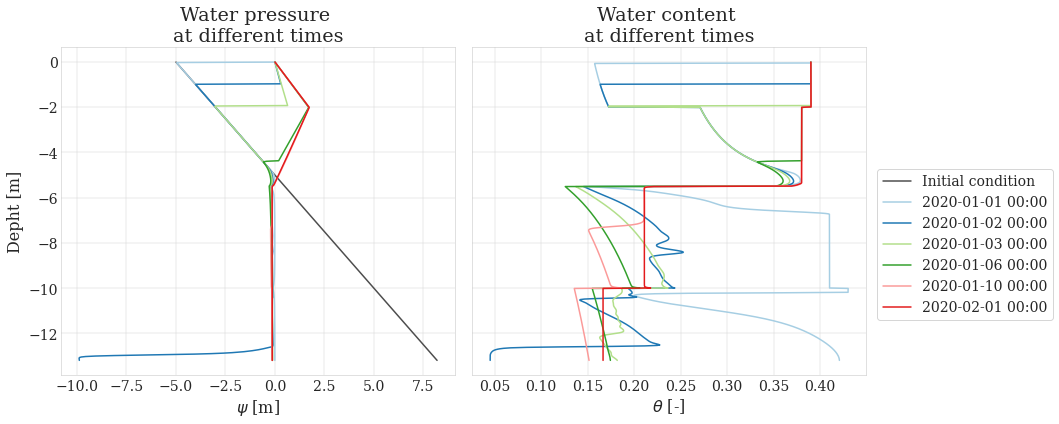

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(15, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2020-01-01 00:00').plot(ax=ax1, y='depth', label='2020-01-01 00:00', color=colors[0])
ds.psi.sel(time='2020-01-02 00:00').plot(ax=ax1, y='depth', label='2020-01-02 00:00', color=colors[1])
ds.psi.sel(time='2020-01-03 00:00').plot(ax=ax1, y='depth', label='2020-01-03 00:00', color=colors[2])
ds.psi.sel(time='2020-01-06 00:00').plot(ax=ax1, y='depth', label='2020-01-06 00:00', color=colors[3])
ds.psi.sel(time='2020-01-10 00:00').plot(ax=ax1, y='depth', label='2020-01-10 00:00', color=colors[4])
ds.psi.sel(time='2020-02-01 00:00').plot(ax=ax1, y='depth', label='2020-02-01 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

# ds.psiIC.plot(y='depth', label='Initial condition', color='0.3')
plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2020-01-01 01:00').plot(ax=ax2, y='depth', label='2020-01-01 00:00', color=colors[0])
ds.theta.sel(time='2020-01-02 00:00').plot(ax=ax2, y='depth', label='2020-01-02 00:00', color=colors[1])
ds.theta.sel(time='2020-01-03 00:00').plot(ax=ax2, y='depth', label='2020-01-03 00:00', color=colors[2])
ds.theta.sel(time='2020-01-06 00:00').plot(ax=ax2, y='depth', label='2020-01-06 00:00', color=colors[3])
ds.theta.sel(time='2020-01-10 00:00').plot(ax=ax2, y='depth', label='2020-01-10 00:00', color=colors[4])
ds.theta.sel(time='2020-02-01 00:00').plot(ax=ax2, y='depth', label='2020-02-01 00:00', color=colors[5])

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

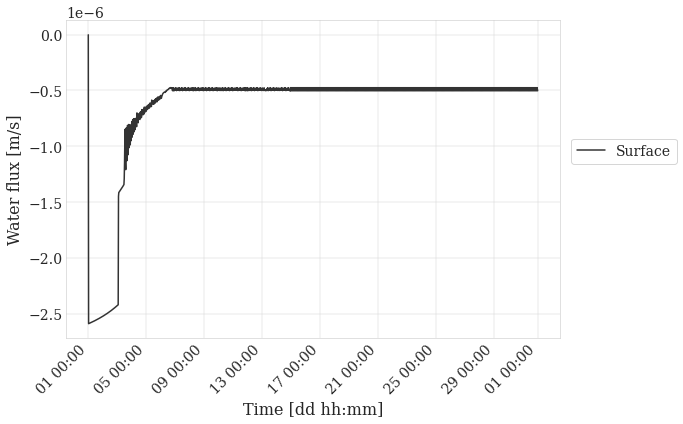

In [17]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
#ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

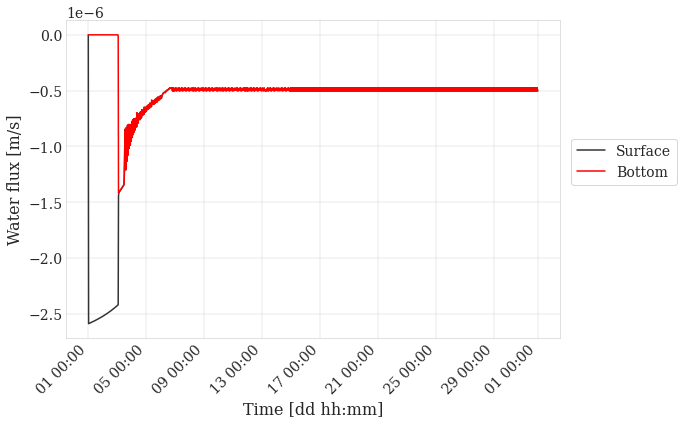

In [18]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

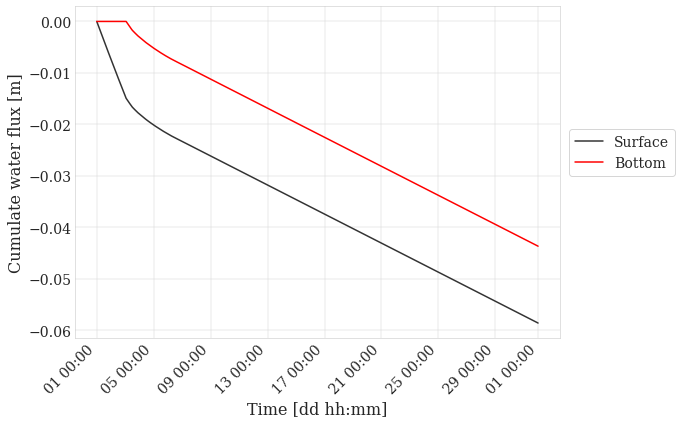

In [20]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()